In [5]:
import matplotlib.pyplot as plt
import utils.file_utils as fu
import numpy as np
import perceptrons.multilayer_perceptron as mlp

In [6]:
learning_rates_paths = "ex_2/resources/training/learning_rates.txt"
k_paths = "ex_2/resources/training/k_vs_errors.txt"
open(learning_rates_paths, "w").close()
open(k_paths, "w").close()

In [7]:
config_file_path = "ex_2/resources/config.json"
config_file = fu.parse_config(config_file_path)

path_to_data = config_file["path_to_data"]
epoch_limit = int(config_file["epoch_limit"])
execution_count = int(config_file["execution_count"])
momentum = bool(config_file["momentum"])
cross_validation_k = int(config_file["cross_validation"])
learn_rate = float(config_file["learn_rate"])
adaptive_learn_rate = bool(config_file["adaptive_learn_rate"])
if adaptive_learn_rate:
    update_learn_rate = (lambda lr, k: lr + 0.3 if k >= 3 else (lr - lr*0.1 if k <=-3 else 0)) 
else:
    update_learn_rate = None
if config_file["activation_function"] == "linear":
    activation_function = (lambda x: x)
    activation_derivative = (lambda x: 1)
elif config_file["activation_function"] == "sigmoid":
    activation_function = (lambda x: 1/(1+np.exp(-2*x)))
    activation_derivative = (lambda x: 2*(1/(1+np.exp(-2*x)))*(1-(1/(1+np.exp(-2*x)))) )

In [8]:
step = 0.01
training, expected = fu.parse_training_set_from_file(path_to_data)
for val in range(1, 60):  
    p = mlp.MultiLayerPerceptron(learning_rate=val*step, hidden_layers=[], input_dim=len(training[0]), output_dim=len(expected[0]), update_frequency=0, activation_function=activation_function, activation_function_derivative=activation_derivative, update_learn_rate=update_learn_rate, scale_output=True,momentum=momentum)
    errors = []
    for i in range(execution_count):
        w, e = p.train(training, expected, epoch_limit, callback=None)
        errors.append(e)
    f = open(path_to_data+"/learning_rates.txt", "a")
    f.write("{},{},{}\n".format(val*step, np.mean(errors), np.std(errors)))
    f.close()

KeyboardInterrupt: 

<ErrorbarContainer object of 3 artists>

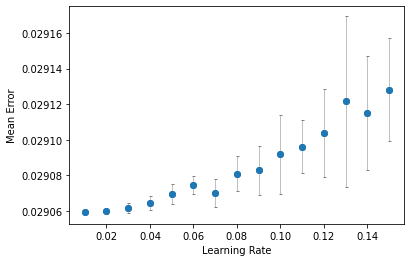

In [9]:
f = open(learning_rates_paths, "r")
lines = f.readlines()
learning_rates = []
mean_errors = []
std_errors =[]
for line in lines:
    lr, mean, std = line.strip().split(",")
    learning_rates.append(float(lr))
    mean_errors.append(float(mean))
    std_errors.append(float(std))
f.close()
plt.scatter(learning_rates, mean_errors)
plt.xlabel("Learning Rate")
plt.ylabel("Mean Error")
plt.errorbar(learning_rates, mean_errors, yerr=std_errors, ecolor = 'grey', elinewidth = 0.5, capsize=1.5, fmt="o")


In [ ]:
    training_groups, expected_groups = m.cross_validation(training,cross_validation_k,expected)
    err_mins = []
    rmsd_mins = []
    for i in range(execution_count):
        err_min = None
        rmsd_min = None
        for i, test_group in enumerate(training_groups):
            errors =[]
            t = training_groups[:i] + training_groups[i+1:]
            training_set = [item for sublist in t for item in sublist]
            e = expected_groups[:i] + expected_groups[i+1:]
            expected_set = [item for sublist in e for item in sublist]
            print(len(training_set))
            print(len(training_set[0]))
            w, err = p.train(training_set, expected_set, epoch_limit, callback=None)
        
            # Test
            for j, test_entry in enumerate(test_group):
                prediction = p.forward_propagation(test_entry)
                expected_output = expected_groups[i][j]
                errors.append(np.abs(np.subtract(prediction , expected_output)))

            # mean_error = m.mean_error(errors)
            max_error = m.max_error(errors)
            # min_error = m.min_error(errors)
            # mse_error = m.mse(errors)
            rmsd_error = m.rmsd(errors)
            if err_min == None or err < err_min:
                err_min = err
            if rmsd_min == None or rmsd_error < rmsd_min:
                rmsd_min = rmsd_error
        err_mins.append(err_min)
        rmsd_mins.append(rmsd_min)

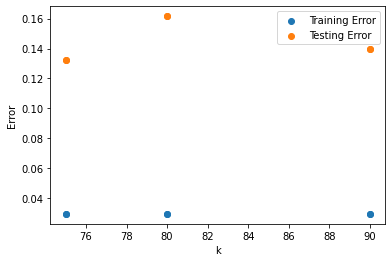

In [7]:

f = open(k_paths, "r")
lines = f.readlines()
training_percentages = []
mean_errors = []
std_errors =[]
mean_rmsd =[]
std_rmsd =[]
for line in lines:
    k, e_mean, e_std, rmsd_mean, rmsd_std  = line.strip().split(",")
    training_percentages.append(((int(k)-1)/int(k))*100)
    mean_errors.append(float(mean))
    std_errors.append(float(std))
    mean_rmsd.append(float(rmsd_mean))
    std_rmsd.append(float(rmsd_std))
f.close()
plt.scatter(training_percentages, mean_errors, label="Training Error")
plt.scatter(training_percentages, mean_rmsd, label="Testing Error")
plt.xlabel("Training set (%)")
plt.ylabel("Error")
plt.errorbar(training_percentages, mean_errors, yerr=std_errors, ecolor = 'grey', elinewidth = 0.5, capsize=1.5, fmt="o")
plt.errorbar(training_percentages, mean_rmsd, yerr=std_rmsd, ecolor = 'grey', elinewidth = 0.5, capsize=1.5, fmt="o")
plt.legend()